<a href="https://colab.research.google.com/github/Aladdin60/Project-Silver-swift/blob/main/prophet%20Time%20series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial data:
        Date  Cash Flow
0 2020-01-01   1.975341
1 2020-01-02  -2.080412
2 2020-01-03 -43.536362
3 2020-01-04  42.838983
4 2020-01-04  31.196232


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcpubyl9v/r7fkjsj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcpubyl9v/kpxqwv0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12810', 'data', 'file=/tmp/tmpcpubyl9v/r7fkjsj0.json', 'init=/tmp/tmpcpubyl9v/kpxqwv0m.json', 'output', 'file=/tmp/tmpcpubyl9v/prophet_modellhy22o7b/prophet_model-20240519053643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast data:
            ds       yhat  yhat_lower  yhat_upper
730 2024-01-31   9.310835  -21.977847   41.353905
731 2024-02-29  12.286184  -20.035638   45.220125
732 2024-03-31  -3.948811  -35.330586   29.783615
733 2024-04-30   3.227337  -27.794703   32.536343
734 2024-05-31  10.111057  -22.116588   43.451678
735 2024-06-30   5.580918  -25.849898   37.109160
736 2024-07-31   4.505061  -27.512734   35.980242
737 2024-08-31   1.346735  -29.262873   34.430025
738 2024-09-30   2.097609  -29.859597   34.081679
739 2024-10-31   1.848253  -28.988393   33.268864
740 2024-11-30   0.915772  -30.274508   30.103016
741 2024-12-31   7.592117  -24.884914   36.377989


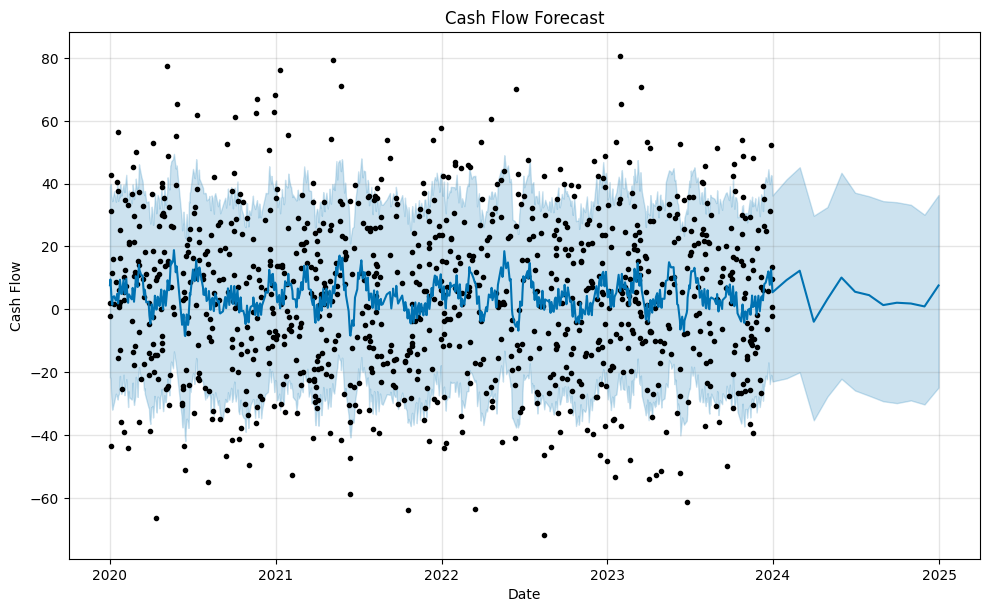

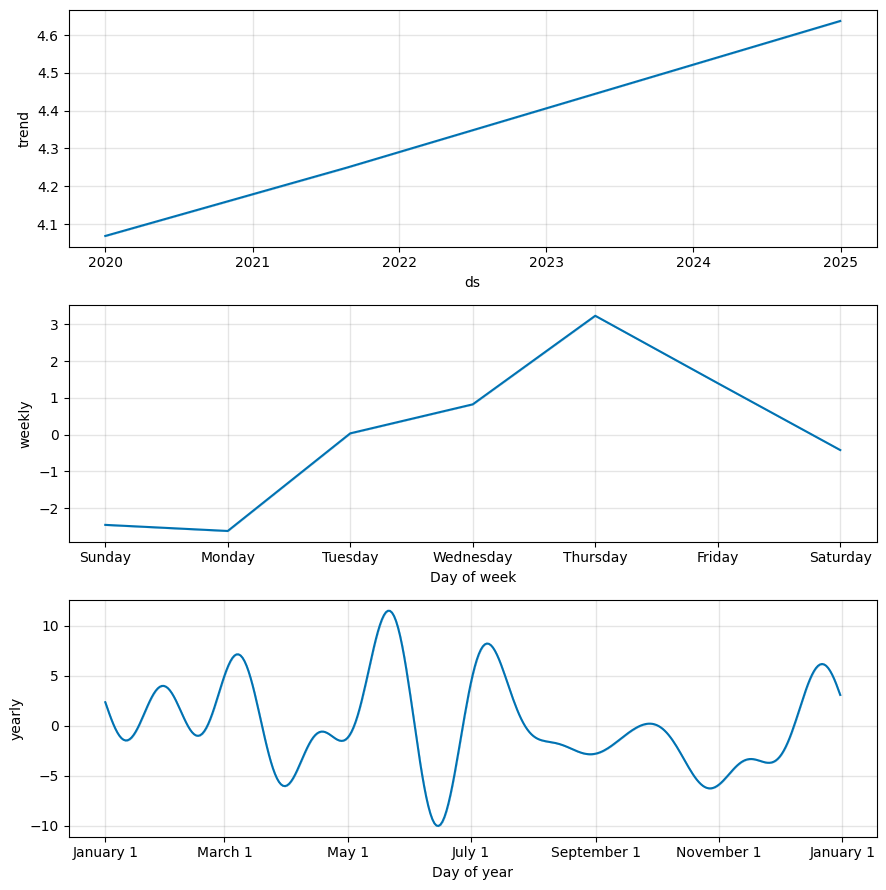

In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Read data from Excel file
file_path = 'time.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print("Initial data:")
print(data.head())

# Ensure the date column is named 'ds' and the cashflow column is named 'y'
data.rename(columns={'Date': 'ds', 'Cash Flow': 'y'}, inplace=True)

# Convert the 'ds' column to datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast 12 months into the future

# Make predictions
forecast = model.predict(future)

# Display forecast
print("Forecast data:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))  # Display the last 12 rows (future predictions)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Cash Flow Forecast')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.show()

# Optional: Plot the forecast components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()
